In [41]:
import pandas as pd
from pickle import dump, load
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle

In [42]:
y_train = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_y_train.csv")
y_test = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_y_test.csv")
X_train = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_X_train.csv")
X_test = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_X_test.csv")

In [43]:
accs = []
percents = [1, 0.8, 0.7, 0.6, 0.5]
for p in percents:
    selection_model = SelectKBest(f_classif, k = int(len(X_train.columns) * p))
    selection_model.fit(X_train, y_train)

    ix = selection_model.get_support()
    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])


    dump(selection_model, open(f"/workspaces/EDA_5_alfonso/models/selection_model{p}.pk", "wb"))
    # Definir el clasificador de árbol de decisión
    model = DecisionTreeClassifier(random_state=24)
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)
    

best_acc = accs.index(max(accs)) 
print(f'The best k for selection is {percents[best_acc]}.')
print(f'The best accuracy we get is {round(accs[best_acc],4)}.')
print(accs)

The best k for selection is 0.6.
The best accuracy we get is 0.7532.
[0.7402597402597403, 0.7012987012987013, 0.7337662337662337, 0.7532467532467533, 0.7532467532467533]


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [44]:
# Definir los parámetros que quieres ajustar
hyperparameters = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [np.arange(3, 11), None],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 5, 10, 20, 50],
    'random_state' : [24]
}

tree_classifier = DecisionTreeClassifier(random_state = 24)

grid = GridSearchCV(tree_classifier, hyperparameters, cv=5)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                       None],
                         'max_leaf_nodes': [None, 5, 10, 20, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10], 'random_state': [24],
                         'splitter': ['best', 'random']})

In [45]:
selection_model = pickle.load(open("/workspaces/EDA_5_alfonso/models/selection_model0.6.pk", "rb"))
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
grid.fit(X_train_sel, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1350 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                       None],
                         'max_leaf_nodes': [None, 5, 10, 20, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10], 'random_state': [24],
                         'splitter': ['best', 'random']})

In [47]:
best_model = grid.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=20, random_state=24)

In [48]:
best_model.fit(X_train_sel, y_train)
y_pred = model.predict(X_test_sel)
accuracy_score(y_test, y_pred)

0.7532467532467533

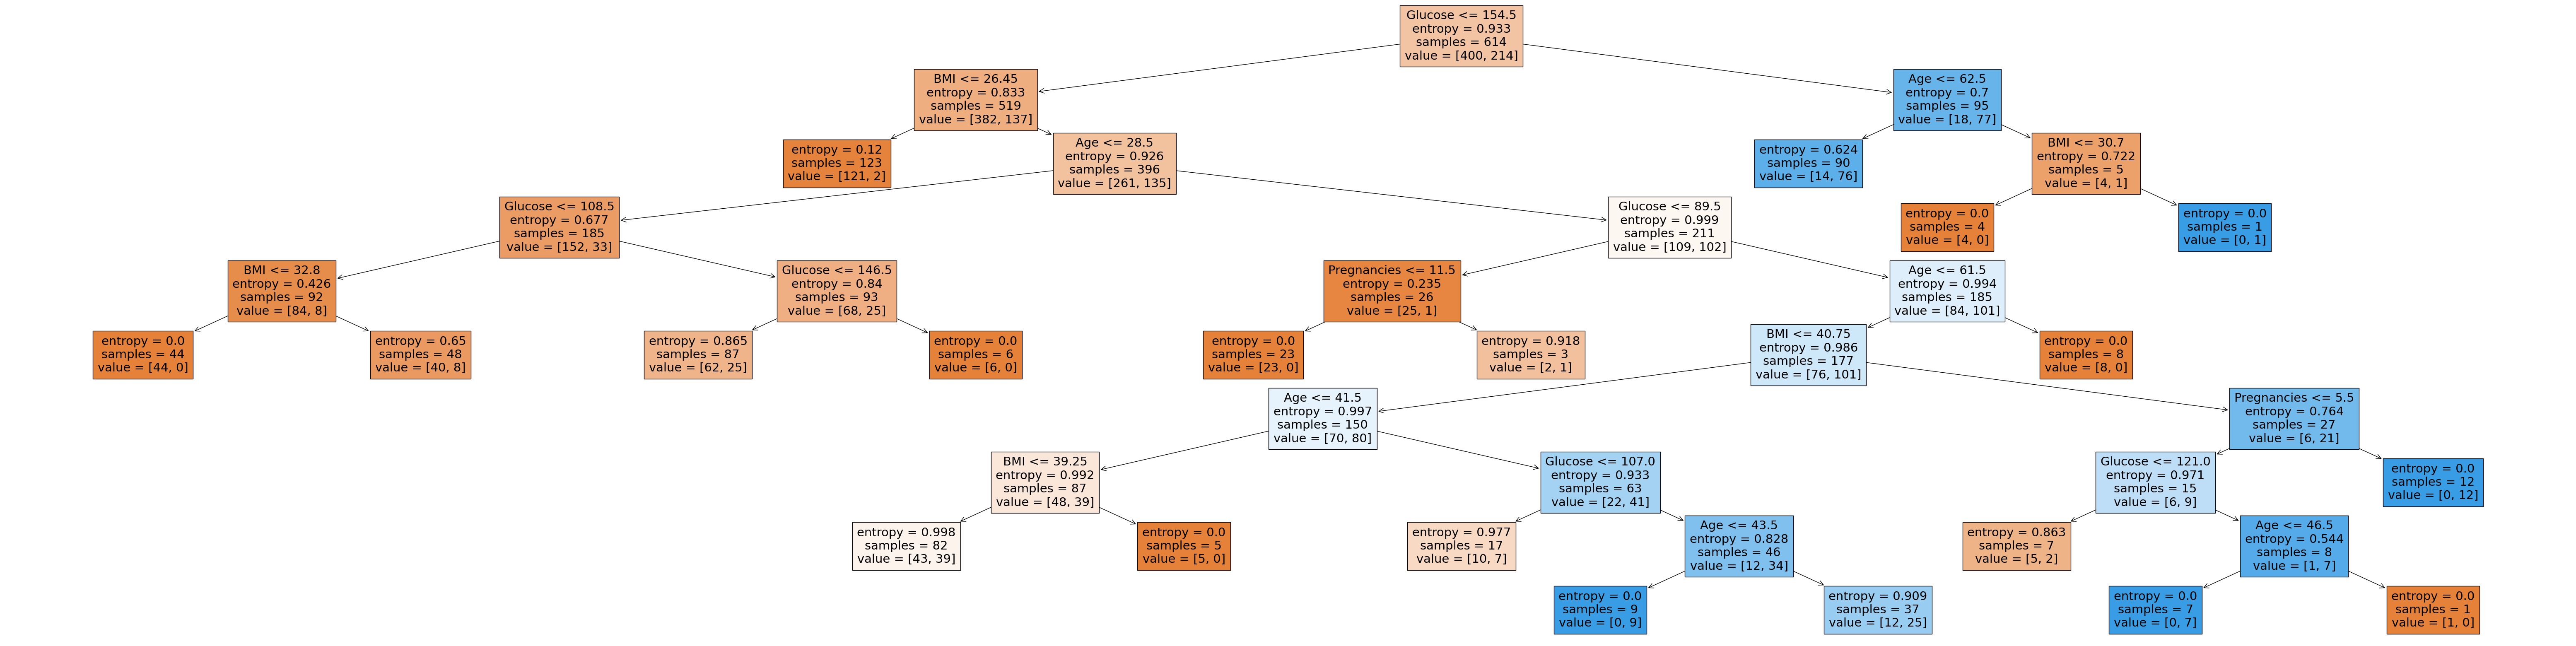

In [49]:
plt.figure(figsize =(80,20))

plot_tree(best_model, feature_names=X_train_sel.columns, max_depth=None, filled=True);
# Guardar la figura como un archivo PNG en el directorio deseado
output_file_path = "/workspaces/EDA_5_alfonso/assets/plot_trees.png"
plt.savefig(output_file_path)

plt.show()
